Dataset Preview:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Processing Sample 1...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


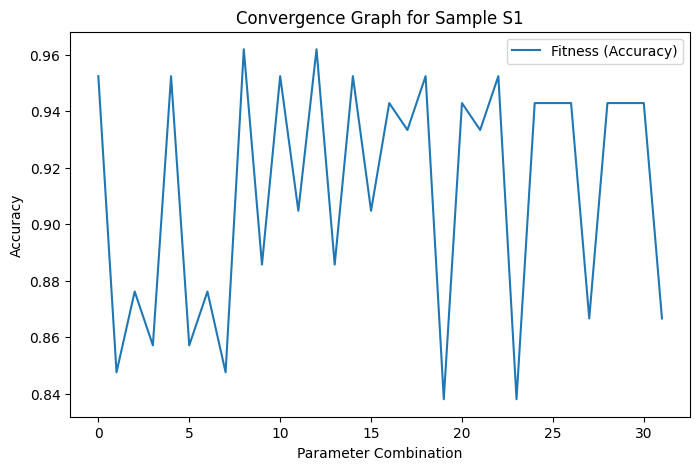

Processing Sample 2...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 3...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 4...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 5...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 6...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 7...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 8...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Processing Sample 9...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


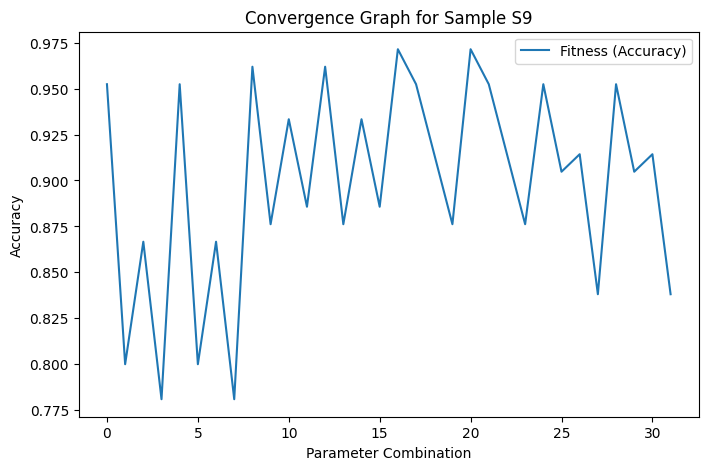

Processing Sample 10...
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Final Results:
  Sample  Best Accuracy                                   Best Parameters
0     S1       0.977778    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
1     S2       0.977778  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
2     S3       0.933333    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
3     S4       0.955556    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
4     S5       0.933333    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
5     S6       0.933333    {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
6     S7       0.955556   {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
7     S8       0.933333  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
8     S9       1.000000   {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
9    S10       0.977778   {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [7]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

print("Dataset Preview:\n", data.head())
scaler = StandardScaler()
X = scaler.fit_transform(X)
results = []
best_overall_accuracy = 0
best_overall_sample = None

for i in range(1, 11):
    print(f"Processing Sample {i}...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    }
    svc = SVC()
    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((f"S{i}", accuracy, best_params))
    if accuracy > best_overall_accuracy:
        best_overall_accuracy = accuracy
        best_overall_sample = i
        plt.figure(figsize=(8, 5))
        plt.plot(grid_search.cv_results_['mean_test_score'], label='Fitness (Accuracy)')
        plt.xlabel('Parameter Combination')
        plt.ylabel('Accuracy')
        plt.title(f'Convergence Graph for Sample S{i}')
        plt.legend()
        plt.show()
results_df = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best Parameters'])
print("\nFinal Results:")
print(results_df)
results_df.to_csv('svm_optimization_results.csv', index=False)


